In [3]:
#(a) (5 points) Using the pandas library, read the csv data file from your S3 bucket and
#create a data-frame called weather. Select data up to October 31, 2011. After that,
#remove any observation with missing values.
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

s3 = boto3.resource('s3')
bucket_name = "rachaeld-data445"
bucket = s3.Bucket(bucket_name)

file_key = 'weather.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the data-file
weather = pd.read_csv(file_content_stream)
weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
## only through 2011-10-31
weather = weather.loc[(weather['hpwren_timestamp'] < '2011-11-01')]
weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [5]:
##dropping na
weather = weather.dropna()

##dropping not needed columns
weather= weather.drop(columns= ['rowID', 'hpwren_timestamp', 'min_wind_direction', 'min_wind_speed', 'rain_accumulation', 'rain_duration'], axis= 1)
weather.head()


,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
1,912.3,63.86,161.0,0.8,215.0,1.5,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,58.8
5,912.3,63.50,76.0,2.5,92.0,3.0,62.6


In [6]:
#(8 points) After consulting with a meteorologist, he recommends to use the following variables for clustering purposes: air pressure,
#    air temp, avg wind direction,avg wind speed, max wind direction, max wind speed, and relative humidity. Transform all the variables
#    of interest to 0-1 scale.

## scaling 
scaler = MinMaxScaler()
weather[['air_pressure_0_1', 'air_temp_0_1', 'avg_wind_direction_0_1', 'avg_wind_speed_0_1', 'max_wind_direction_0_1',
        'max_wind_speed_0_1', 'relative_humidity_0_1']] = scaler.fit_transform(weather)
weather.head(10)



,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1
1,912.3,63.86,161.0,0.8,215.0,1.5,39.9,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000
2,912.3,64.22,77.0,0.7,143.0,1.2,43.0,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429
3,912.3,64.40,89.0,1.2,112.0,1.6,49.5,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714
4,912.3,64.40,185.0,0.4,260.0,1.0,58.8,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000
5,912.3,63.50,76.0,2.5,92.0,3.0,62.6,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429
6,912.3,62.78,79.0,2.4,89.0,2.7,65.6,0.16,0.380392,0.220056,0.102564,0.247911,0.100775,0.693714
7,912.3,62.42,86.0,2.0,92.0,2.4,65.2,0.16,0.372549,0.239554,0.085470,0.256267,0.089147,0.689143
8,912.3,62.24,105.0,1.4,125.0,1.9,65.8,0.16,0.368627,0.292479,0.059829,0.348189,0.069767,0.696000
9,912.3,62.24,93.0,0.4,126.0,0.7,58.6,0.16,0.368627,0.259053,0.017094,0.350975,0.023256,0.613714
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5,0.16,0.368627,0.401114,0.051282,0.465181,0.065891,0.384000


Matplotlib is building the font cache; this may take a moment.


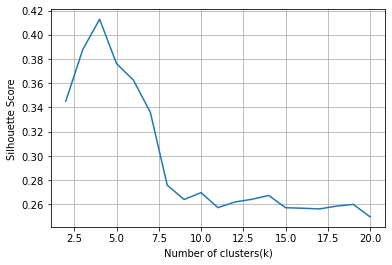

In [7]:
#(8 points) Using the silhouette score, estimate the number of clusters for this dataset.
#Consider 2 to 20 clusters. Make sure to use n init = 20 in the KMeans function from
#the sklearn.cluster library.

## defining a lists to store silhouette scores
silhouette = list()

for i in range (2,21):
    ##clustering the data into i clusters
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(weather[['air_pressure_0_1', 'air_temp_0_1', 'avg_wind_direction_0_1', 'avg_wind_speed_0_1', 'max_wind_direction_0_1',
        'max_wind_speed_0_1', 'relative_humidity_0_1']])
    kmeans_md_labels = kmeans_md.labels_

    ##computing the silhouette score
    score = silhouette_score(weather[['air_pressure_0_1', 'air_temp_0_1', 'avg_wind_direction_0_1', 'avg_wind_speed_0_1', 'max_wind_direction_0_1',
        'max_wind_speed_0_1', 'relative_humidity_0_1']], kmeans_md_labels)
    silhouette.append(score)
    
##visualizing the results
import matplotlib.pyplot as plt

plt.plot(range(2,21), silhouette)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show();


In [9]:
#(6 points) Using the KMeans function from the sklearn.cluster library, cluster the
#customers into the number of clusters estimated from part (c).
num_clusters = KMeans(n_clusters = 4, n_init = 20).fit(weather[['air_pressure_0_1', 'air_temp_0_1', 'avg_wind_direction_0_1', 'avg_wind_speed_0_1', 'max_wind_direction_0_1',
        'max_wind_speed_0_1', 'relative_humidity_0_1']])

##appending labels 
weather['cluster'] = num_clusters.labels_
weather.head(10)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
1,912.3,63.86,161.0,0.8,215.0,1.5,39.9,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000,0
2,912.3,64.22,77.0,0.7,143.0,1.2,43.0,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429,1
3,912.3,64.40,89.0,1.2,112.0,1.6,49.5,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714,1
4,912.3,64.40,185.0,0.4,260.0,1.0,58.8,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000,2
5,912.3,63.50,76.0,2.5,92.0,3.0,62.6,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429,1
6,912.3,62.78,79.0,2.4,89.0,2.7,65.6,0.16,0.380392,0.220056,0.102564,0.247911,0.100775,0.693714,2
7,912.3,62.42,86.0,2.0,92.0,2.4,65.2,0.16,0.372549,0.239554,0.085470,0.256267,0.089147,0.689143,2
8,912.3,62.24,105.0,1.4,125.0,1.9,65.8,0.16,0.368627,0.292479,0.059829,0.348189,0.069767,0.696000,2
9,912.3,62.24,93.0,0.4,126.0,0.7,58.6,0.16,0.368627,0.259053,0.017094,0.350975,0.023256,0.613714,2
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5,0.16,0.368627,0.401114,0.051282,0.465181,0.065891,0.384000,0


In [16]:
#(8 points) Describe each of the clusters. Does the clustering results make sense? if not,
#suggest how would improve this analysis.

##cluster 0
cluster_0 = weather[weather['cluster'] == 0]
cluster_0.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
count,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.0
mean,917.001001,72.794737,213.735038,2.171211,231.623548,2.693417,34.340847,0.630100,0.598578,0.595362,0.092787,0.645191,0.100520,0.336467,0.0
std,1.561747,5.548670,53.439222,1.307002,54.811921,1.468162,13.194696,0.156175,0.120886,0.148856,0.055855,0.152679,0.056906,0.150797,0.0
min,911.100000,52.520000,66.000000,0.000000,141.000000,0.100000,4.900000,0.040000,0.156863,0.183844,0.000000,0.392758,0.000000,0.000000,0.0
25%,915.900000,68.720000,178.000000,1.100000,190.000000,1.500000,24.500000,0.520000,0.509804,0.495822,0.047009,0.529248,0.054264,0.224000,0.0
50%,917.100000,72.500000,202.000000,2.000000,216.000000,2.500000,32.600000,0.640000,0.592157,0.562674,0.085470,0.601671,0.093023,0.316571,0.0
75%,918.100000,77.000000,227.000000,3.000000,253.000000,3.600000,43.900000,0.740000,0.690196,0.632312,0.128205,0.704735,0.135659,0.445714,0.0
max,920.700000,91.220000,357.000000,8.600000,359.000000,10.100000,66.200000,1.000000,1.000000,0.994429,0.367521,1.000000,0.387597,0.700571,0.0


In [12]:
##cluster 1
cluster_1 = weather[weather['cluster'] == 1]
cluster_1.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
count,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.000000,28509.0
mean,917.000284,70.893208,42.652917,2.158617,58.303167,2.616426,30.418128,0.630028,0.557151,0.118810,0.092249,0.162404,0.097536,0.291636,1.0
std,1.533136,6.824821,27.998297,1.324800,30.510039,1.548824,13.260520,0.153314,0.148689,0.077990,0.056615,0.084986,0.060032,0.151549,0.0
min,911.300000,46.040000,0.000000,0.100000,0.000000,0.100000,4.900000,0.060000,0.015686,0.000000,0.004274,0.000000,0.000000,0.000000,1.0
25%,915.700000,66.020000,20.000000,1.200000,37.000000,1.500000,21.500000,0.500000,0.450980,0.055710,0.051282,0.103064,0.054264,0.189714,1.0
50%,917.200000,71.240000,40.000000,1.800000,53.000000,2.200000,28.200000,0.650000,0.564706,0.111421,0.076923,0.147632,0.081395,0.266286,1.0
75%,918.200000,75.560000,58.000000,2.800000,72.000000,3.300000,35.900000,0.750000,0.658824,0.161560,0.119658,0.200557,0.124031,0.354286,1.0
max,920.700000,90.680000,132.000000,8.900000,248.000000,11.000000,79.700000,1.000000,0.988235,0.367688,0.380342,0.690808,0.422481,0.854857,1.0


In [13]:
##cluster 2
cluster_2 = weather[weather['cluster'] == 2]
cluster_2.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
count,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.000000,16449.0
mean,915.714512,54.470268,192.787647,2.551456,203.246884,3.154192,82.137036,0.501451,0.199352,0.537013,0.109037,0.566147,0.118380,0.882709,2.0
std,1.770588,5.340013,68.842750,1.900278,70.712455,2.243647,11.091357,0.177059,0.116340,0.191763,0.081208,0.196971,0.086963,0.126758,0.0
min,910.700000,45.320000,0.000000,0.100000,0.000000,0.100000,47.500000,0.000000,0.000000,0.000000,0.004274,0.000000,0.000000,0.486857,2.0
25%,914.700000,50.720000,172.000000,1.100000,184.000000,1.500000,71.900000,0.400000,0.117647,0.479109,0.047009,0.512535,0.054264,0.765714,2.0
50%,915.700000,53.060000,196.000000,2.100000,208.000000,2.600000,89.100000,0.500000,0.168627,0.545961,0.089744,0.579387,0.096899,0.962286,2.0
75%,916.900000,58.100000,226.000000,3.500000,239.000000,4.300000,91.500000,0.620000,0.278431,0.629526,0.149573,0.665738,0.162791,0.989714,2.0
max,920.000000,68.900000,359.000000,23.400000,359.000000,25.900000,92.400000,0.930000,0.513725,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [14]:
##cluster 3
cluster_3 = weather[weather['cluster'] == 3]
cluster_3.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.0
mean,916.821091,70.618139,341.355601,1.519632,20.840432,2.134656,33.058285,0.612109,0.551158,0.950851,0.064942,0.058051,0.078863,0.321809,3.0
std,1.421600,7.339185,20.137444,1.005371,22.336000,1.273741,14.215578,0.142160,0.159895,0.056093,0.042965,0.062217,0.049370,0.162464,0.0
min,911.600000,46.220000,209.000000,0.000000,0.000000,0.100000,8.700000,0.090000,0.019608,0.582173,0.000000,0.000000,0.000000,0.043429,3.0
25%,915.900000,66.380000,335.000000,0.700000,5.000000,1.200000,24.300000,0.520000,0.458824,0.933148,0.029915,0.013928,0.042636,0.221714,3.0
50%,916.800000,71.420000,348.000000,1.300000,13.000000,1.900000,29.400000,0.610000,0.568627,0.969359,0.055556,0.036212,0.069767,0.280000,3.0
75%,917.900000,76.280000,355.000000,2.100000,28.000000,2.800000,39.000000,0.720000,0.674510,0.988858,0.089744,0.077994,0.104651,0.389714,3.0
max,920.700000,90.500000,359.000000,7.000000,141.000000,8.700000,90.100000,1.000000,0.984314,1.000000,0.299145,0.392758,0.333333,0.973714,3.0
